**Problem Statement:**
One of the key activities of any IT function is to “Keep the lights on” to ensure there is noimpact to the Business operations. IT leverages Incident Management process to achieve theabove Objective. An incident is something that is unplanned interruption to an IT service orreduction in the quality of an IT service that affects the Users and the Business. The main goalof Incident Management process is to provide a quick fix / workarounds or solutions thatresolves the interruption and restores the service to its full capacity to ensure no businessimpact.In most of the organizations, incidents are created by various Business and IT Users, End Users/ Vendors if they have access to ticketing systems, and from the integrated monitoringsystems and tools. Assigning the incidents to the appropriate person or unit in the support team has critical importance to provide improved user satisfaction while ensuring better allocation of support resources. The assignment of incidents to appropriate IT groups is still a manual process in many of the IT organizations.Manual assignment of incidents is time consuming and requires humanefforts. There may bemistakes due to human errors and resource consumption is carried out ineffectively because ofthe misaddressing. On the other hand, manual assignment increases the response and resolution times which result in user satisfaction deterioration / poor customer service

**Business Domain Value:** In the support process, incoming incidents are analyzed and assessed by organization’s support teams to fulfill the request. In many organizations, better allocation and effective usage of the valuable support resources will directly result in substantial cost savings.Currently the incidents are created by various stakeholders (Business Users, IT Users and Monitoring Tools) within IT Service Management Tool and are assigned to Service Desk teams (L1/ L2 teams). This team will review the incidents for right ticket categorization, priorities and then carry out initial diagnosis to see if they can resolve. Around ~54% of the incidents are resolved by L1 / L2 teams. Incase L1 / L2 is unable to resolve, they will then escalate / assign the tickets to Functional teams from Applications and Infrastructure (L3 teams). Some portions of incidents are directly assigned to L3 teams by either Monitoring tools or Callers / Requestors. L3 teams will carry out detailed diagnosis and resolve the incidents. Around ~56% of incidents are resolved by Functional / L3 teams. Incase if vendor support is needed, they will reach out for their support towards incident closure.L1 / L2 needs to spend time reviewing Standard Operating Procedures (SOPs) before assigning to Functional teams (Minimum ~25-30% of incidents needs to be reviewed for SOPs before ticket assignment). 15 min is being spent for SOP review for each incident. Minimum of ~1 FTE effort needed only for incident assignment to L3 teams.
 

**Project Goal:**
In this capstone project, the goal is to build a classifier that can classify the tickets by analyzingtext.

**Pre-Processing, Data Visualizationand EDA**


*   Exploring the given Data files
*   Understanding the structure of data
*   Exploring the given Data files
*   Missing points in data
*   Finding inconsistencies in the data
*   Visualizing different patterns 
*   Visualizing different text features
*   Dealing with missing values
*   Text preprocessing 
*   Creating word vocabulary from the corpus of report text data
*   Creating tokens as required


In [ ]:
#Moount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Path where the images are located
path = '/content/drive/MyDrive/COLAB/AIML/Capstone Project/Data/'

In [ ]:
#Import required libraries
import numpy as np
import pandas as pd
import random

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import re

In [ ]:
pip install langdetect

     |████████████████████████████████| 981 kB 21.7 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=3f9d770a2867a22c77d119cb9282efcb489669cf401511b48dad16357279fef1
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [ ]:
import langdetect

In [ ]:
from langdetect import detect

In [ ]:
# Initialize the random number generator
random.seed(0)

In [ ]:
# Data frame of blog text
df = pd.read_excel(path+'InputData.xlsx')

In [ ]:
#Exploring the given Data files
df.head()

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,_x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,_x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


Given file is having 4 columns, short description, descrption, caller and assignment group. For our objective, caller is not required we can drop the column.

In [ ]:
df.drop("Caller",axis='columns', inplace=True)

In [ ]:
#Shape of data set
df.shape

(8500, 3)

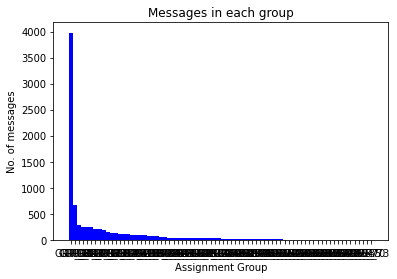

In [ ]:
#As this is clasification problem of identifying group based on message, we have to see the distribution based on group
# creating the bar plot
plt.bar(df['Assignment group'].value_counts().index, df['Assignment group'].value_counts(), color ='blue',
        width = 1)
plt.xlabel("Assignment Group")
plt.ylabel("No. of messages")
plt.title("Messages in each group")
plt.show()

Only one group group_0 is showing high value than other groups, we have class imbalance problem in data. 

In [ ]:
#identify any null values in the data set
df.isna().sum()

Short description    8
Description          1
Assignment group     0
dtype: int64

In [ ]:
#droppping the values having na
df = df.dropna()

In [ ]:
df['Description'].apply(lambda x : len(x)).max()
#df['Description'].apply(len)

14441

In [ ]:
#Check the max and min length of description
print('Maximum length in descrption column {}'.format(df['Description'].apply(lambda x : len(x)).max()))
print('Minimum length in description column {}'.format(df['Description'].apply(lambda x : len(x)).min()))

Maximum length in descrption column 14441
Minimum length in description column 1


In [ ]:
#Removing special char functions
df['Description']=df['Description'].apply(lambda x : re.sub(r"[^A-Za-z \s]","",x))

In [ ]:
df[df['Description'].apply(lambda x : len(re.findall(r"xD\n",x))) == 0].count();

In [ ]:
#Found "xD\n" string which is not a meaningfull text, need to remove
df['Description']=df['Description'].apply(lambda x : re.sub(r"xD\n","",x))

In [ ]:
#Check the max and min words of description
print('Maximum word length in descrption column {}'.format(df['Description'].apply(lambda x : len(x.split())).max()))
print('Minimum word length in description column {}'.format(df['Description'].apply(lambda x : len(x.split())).min()))

Maximum word length in descrption column 1049
Minimum word length in description column 0


In [ ]:
#Identify the word length in each description
df['word_length'] = df['Description'].apply(lambda x : len(x.split()))

In [ ]:
#Remove the records which are having word length 0 and 1 as we can't classify based on 1 word.
df = df.drop(df[df['word_length']<=1].index)

In [ ]:
df.shape

(8337, 4)

In [ ]:
#Identify lang for each message
df['desc_lang']=df['Description'].apply(lambda x : detect(x))

In [ ]:
df['desc_lang'].value_counts();

In [ ]:
df[df['desc_lang'] == 'de']

NameError: ignored

In [ ]:
from translate import Translator
translator= Translator(from_lang="german",to_lang="english")

translator.translate("Guten Morgen")